In [1]:
from math import exp, sqrt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
from IPython.display import HTML
from tqdm import tqdm

# Scheme O42

## Settings

In [2]:
C1 = 0.5
count1 = 500

## Code

In [3]:
# parameters
r_min = 0
r_max = 1.8
c = 1.5
a = 0.6
b = 1.2
T = 1.5
t = 0
count2 = count1 * 3
count3 = count1 * 9
h1 = (r_max - r_min) / count1
h2 = (r_max - r_min) / count2
h3 = (r_max - r_min) / count3
tau1 = C1 * h1 / c
tau2 = tau1 / 9
tau3 = tau1 / 81
timeBegin, timeEnd = 1.1, 1.8

In [4]:
def r(i, h):
    return r_min + (i - 0.5)*h
r1 = [r(i, h1) for i in range(count1 + 2)]
r2 = [r(i, h2) for i in range(count2 + 2)]
r3 = [r(i, h3) for i in range(count3 + 2)]

In [5]:
def get_v0(r):
    if a < r < b:
        return exp((-4*(2*r - (a + b))**2) / ((b - a)**2 - (2*r - (a + b))**2))
    return 0

In [6]:
def gen_next(u, f, u_prev, h, tau, r):
    u_next = [0 for _ in range(len(u))]
    for i in range(2, len(u) - 2):
        u_next[i] = 2 * u[i] - u_prev[i] + (tau**2 * c**2) / h**2 * (
            -5/2*u[i] + 4/3*u[i + 1] + 4/3*u[i-1] - 1/12 * u[i + 2] - 1/12 * u[i - 2]
        )
    u_next[0] = u_next[1] = u_next[2]
    u_next[-1] = u_next[-2] = u_next[-3]
    return u_next

In [7]:
def calc_C(u1, u2):
    if len(u1) == count1 + 2:
        u1_ = u1[1:-1]
        u2_ = u2[2:-2:3]
        ans = [abs(u1_[i] - u2_[i]) for i in range(len(u2_))]
    else:
        u1_ = u1[2:-2:3]
        u2_ = u2[5:-5:9]
        ans = [abs(u1_[i] - u2_[i]) for i in range(len(u2_))]
    return max(ans)

In [8]:
def calc_L2(u1, u2):
    if len(u1) == count1 + 2:
        u1_ = u1[1:-1]
        u2_ = u2[2:-2:3]
    else:
        u1_ = u1[2:-2:3]
        u2_ = u2[5:-5:9]
    ans = [(abs(u1_[i] - u2_[i]))**2 for i in range(len(u2_))]
    return sqrt(sum(ans))

In [9]:
def U(r):
    if a < r < b:
        return exp((-4*(2*r - (a + b))**2) / ((b - a)**2 - (2*r - (a + b))**2))
    return 0

In [10]:
analSol = lambda t, r: r ** ((1 - 1) / 2) * U(c * t - r)

In [11]:
u01 = [analSol(timeBegin, r(i, h1)) for i in range(count1 + 2)]
u02 = [analSol(timeBegin, r(i, h2)) for i in range(count2 + 2)]
u03 = [analSol(timeBegin, r(i, h3)) for i in range(count3 + 2)]
f1 = [0 for _ in range(count1 + 2)]
f2 = [0 for _ in range(count2 + 2)]
f3 = [0 for _ in range(count3 + 2)]

In [12]:
u_next1 = [analSol(timeBegin + tau1, r(i, h1)) for i in range(count1 + 2)]

u_next2 = [analSol(timeBegin + tau2, r(i, h2)) for i in range(count2 + 2)]
for _ in range(8):
    y2 = gen_next(u_next2, f2, u02, h2, tau2, r2)
    u_next2, u02 = y2, u_next2

u_next3 = [analSol(timeBegin + tau3, r(i, h3)) for i in range(count3 + 2)]
for _ in range(80):
    y3 = gen_next(u_next3, f3, u03, h3, tau3, r3)
    u_next3, u03 = y3, u_next3

In [13]:
norm_c = []
norm_L2 = []
time = []
t = timeBegin + tau1
with tqdm(total=int((T - t)/tau3)) as pbar:
    while t < T:
        t += tau1
        y1 = gen_next(u_next1, f1, u01, h1, tau1, r1)
        u_next1, u01 = y1, u_next1
        for _ in range(9):
            y2 = gen_next(u_next2, f2, u02, h2, tau2, r2)
            u_next2, u02 = y2, u_next2
        for _ in range(81):
            y3 = gen_next(u_next3, f3, u03, h3, tau3, r3)
            u_next3, u03 = y3, u_next3
            pbar.update(1)
        time.append(t)
        norm_L2.append(calc_L2(u_next1, u_next2) / calc_L2(u_next2, u_next3))
        norm_c.append(calc_C(u_next1, u_next2) / calc_C(u_next2, u_next3))


26973it [00:41, 644.12it/s]                                                                                                                                                                                                                                                                                                                                                                                                                 


<IPython.core.display.Javascript object>


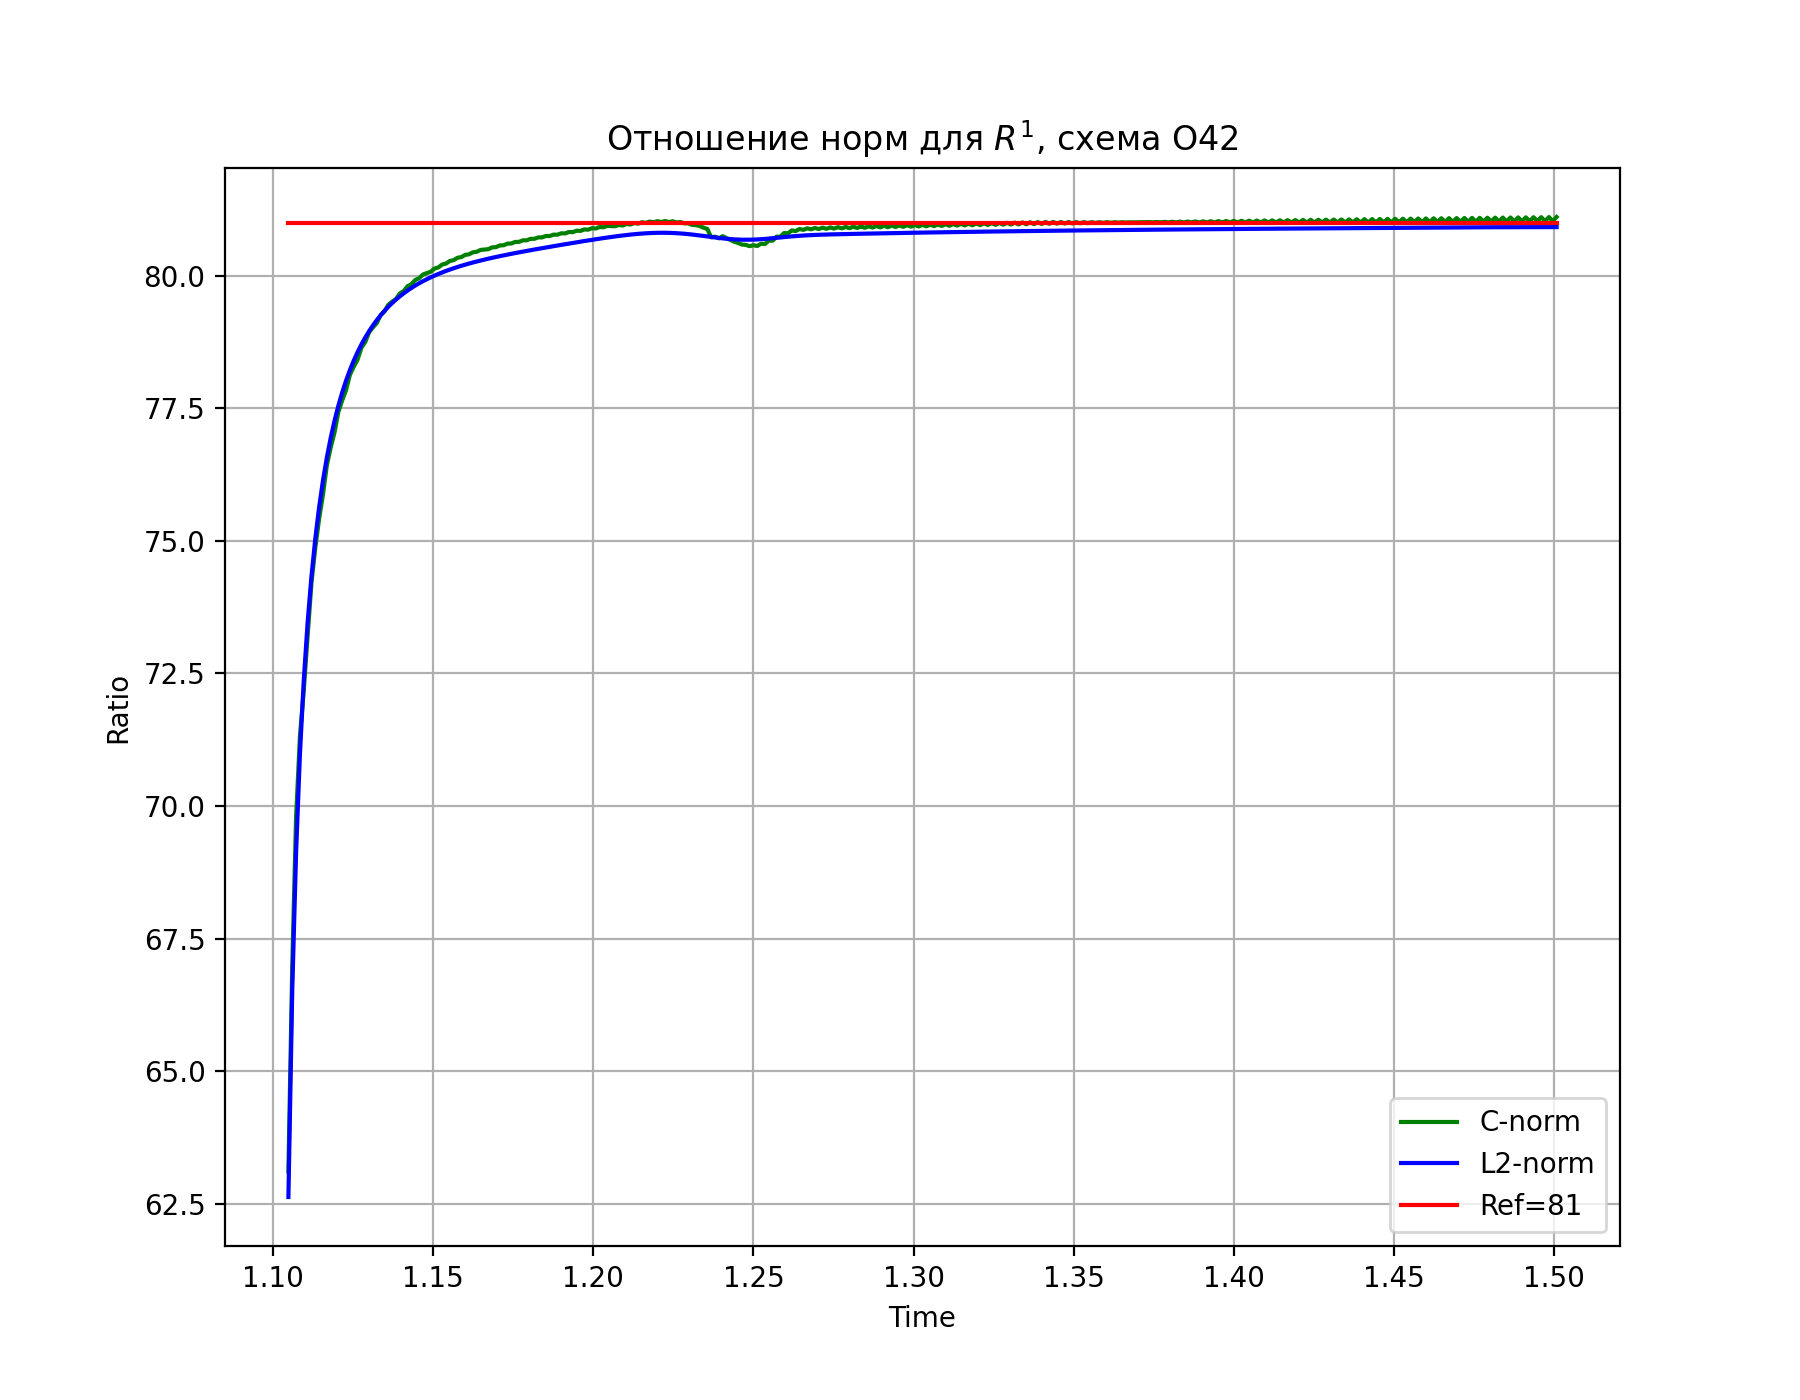

In [14]:
fig, ax = plt.subplots(figsize = (9, 7))
ax.plot(time[2:], norm_c[2:], 'g')
ax.plot(time[2:], norm_L2[2:], 'b')
ax.plot(time[2:], [81 for _ in range(len(time) - 2)], 'r')
# ax.plot(time[2:], [3 for _ in range(len(time) - 2)], 'r')
ax.set_title(f"Отношение норм для $R^{1}$, схема O42")
ax.grid()
ax.legend(['C-norm', 'L2-norm', 'Ref=81'], loc=4)
ax.set_xlabel('Time')
ax.set_ylabel('Ratio')

plt.show()

# Scheme O62

## Settings

In [15]:
C2 = 0.5
count1 = 500

## Code

In [16]:
# parameters
r_min = 0
r_max = 1.8
c = 1.5
a = 0.6
b = 1.2
T = 1.5
t = 0
count2 = count1 * 3
count3 = count1 * 9
h1 = (r_max - r_min) / count1
h2 = (r_max - r_min) / count2
h3 = (r_max - r_min) / count3
tau1 = C2 * h1 / c
tau2_ = tau1 / 27
tau3_ = tau1 / 729
timeBegin, timeEnd = 1.1, 1.8

In [17]:
def gen_next(u, f, u_prev, h, tau, r):
    u_next = [0 for _ in range(len(u))]
    for i in range(3, len(u) - 3):
        u_next[i] = 2 * u[i] - u_prev[i] + (c**2 * tau**2 /(h**2) * (1/90*u[i+3] - 3/20*u[i + 2] + 3/2*u[i+1] - 2*49/36 * u[i] + 3/2*u[i-1] -3/20* u[i-2] + 1/90 * u[i-3]))
    u_next[0] = u_next[1] = u_next[2] = u_next[3]
    u_next[-1] = u_next[-2] = u_next[-3] = u_next[-4]
    return u_next

In [18]:
u01 = [analSol(timeBegin, r(i, h1)) for i in range(count1 + 2)]
u02 = [analSol(timeBegin, r(i, h2)) for i in range(count2 + 2)]
u03 = [analSol(timeBegin, r(i, h3)) for i in range(count3 + 2)]
f1 = [0 for _ in range(count1 + 2)]
f2 = [0 for _ in range(count2 + 2)]
f3 = [0 for _ in range(count3 + 2)]

In [19]:
u_next1 = [analSol(timeBegin + tau1, r(i, h1)) for i in range(count1 + 2)]

u_next2 = [analSol(timeBegin + tau2_, r(i, h2)) for i in range(count2 + 2)]
for _ in range(26):
    y2 = gen_next(u_next2, f2, u02, h2, tau2_, r2)
    u_next2, u02 = y2, u_next2

u_next3 = [analSol(timeBegin + tau3_, r(i, h3)) for i in range(count3 + 2)]
for _ in range(728):
    y3 = gen_next(u_next3, f3, u03, h3, tau3_, r3)
    u_next3, u03 = y3, u_next3

In [20]:
norm_c = []
norm_L2 = []
time = []
t = timeBegin + tau1
with tqdm(total=int((T - t)/tau3_)) as pbar:
    while t < T:
        t += tau1
        y1 = gen_next(u_next1, f1, u01, h1, tau1, r1)
        u_next1, u01 = y1, u_next1
        for _ in range(27):
            y2 = gen_next(u_next2, f2, u02, h2, tau2_, r2)
            u_next2, u02 = y2, u_next2
        for _ in range(729):
            y3 = gen_next(u_next3, f3, u03, h3, tau3_, r3)
            u_next3, u03 = y3, u_next3
            pbar.update(1)
        time.append(t)
        norm_L2.append(calc_L2(u_next1, u_next2) / calc_L2(u_next2, u_next3))
        norm_c.append(calc_C(u_next1, u_next2) / calc_C(u_next2, u_next3))

242757it [07:19, 552.35it/s]                                                                                                                                                                                                                                                                                                                                                                                                                


<IPython.core.display.Javascript object>


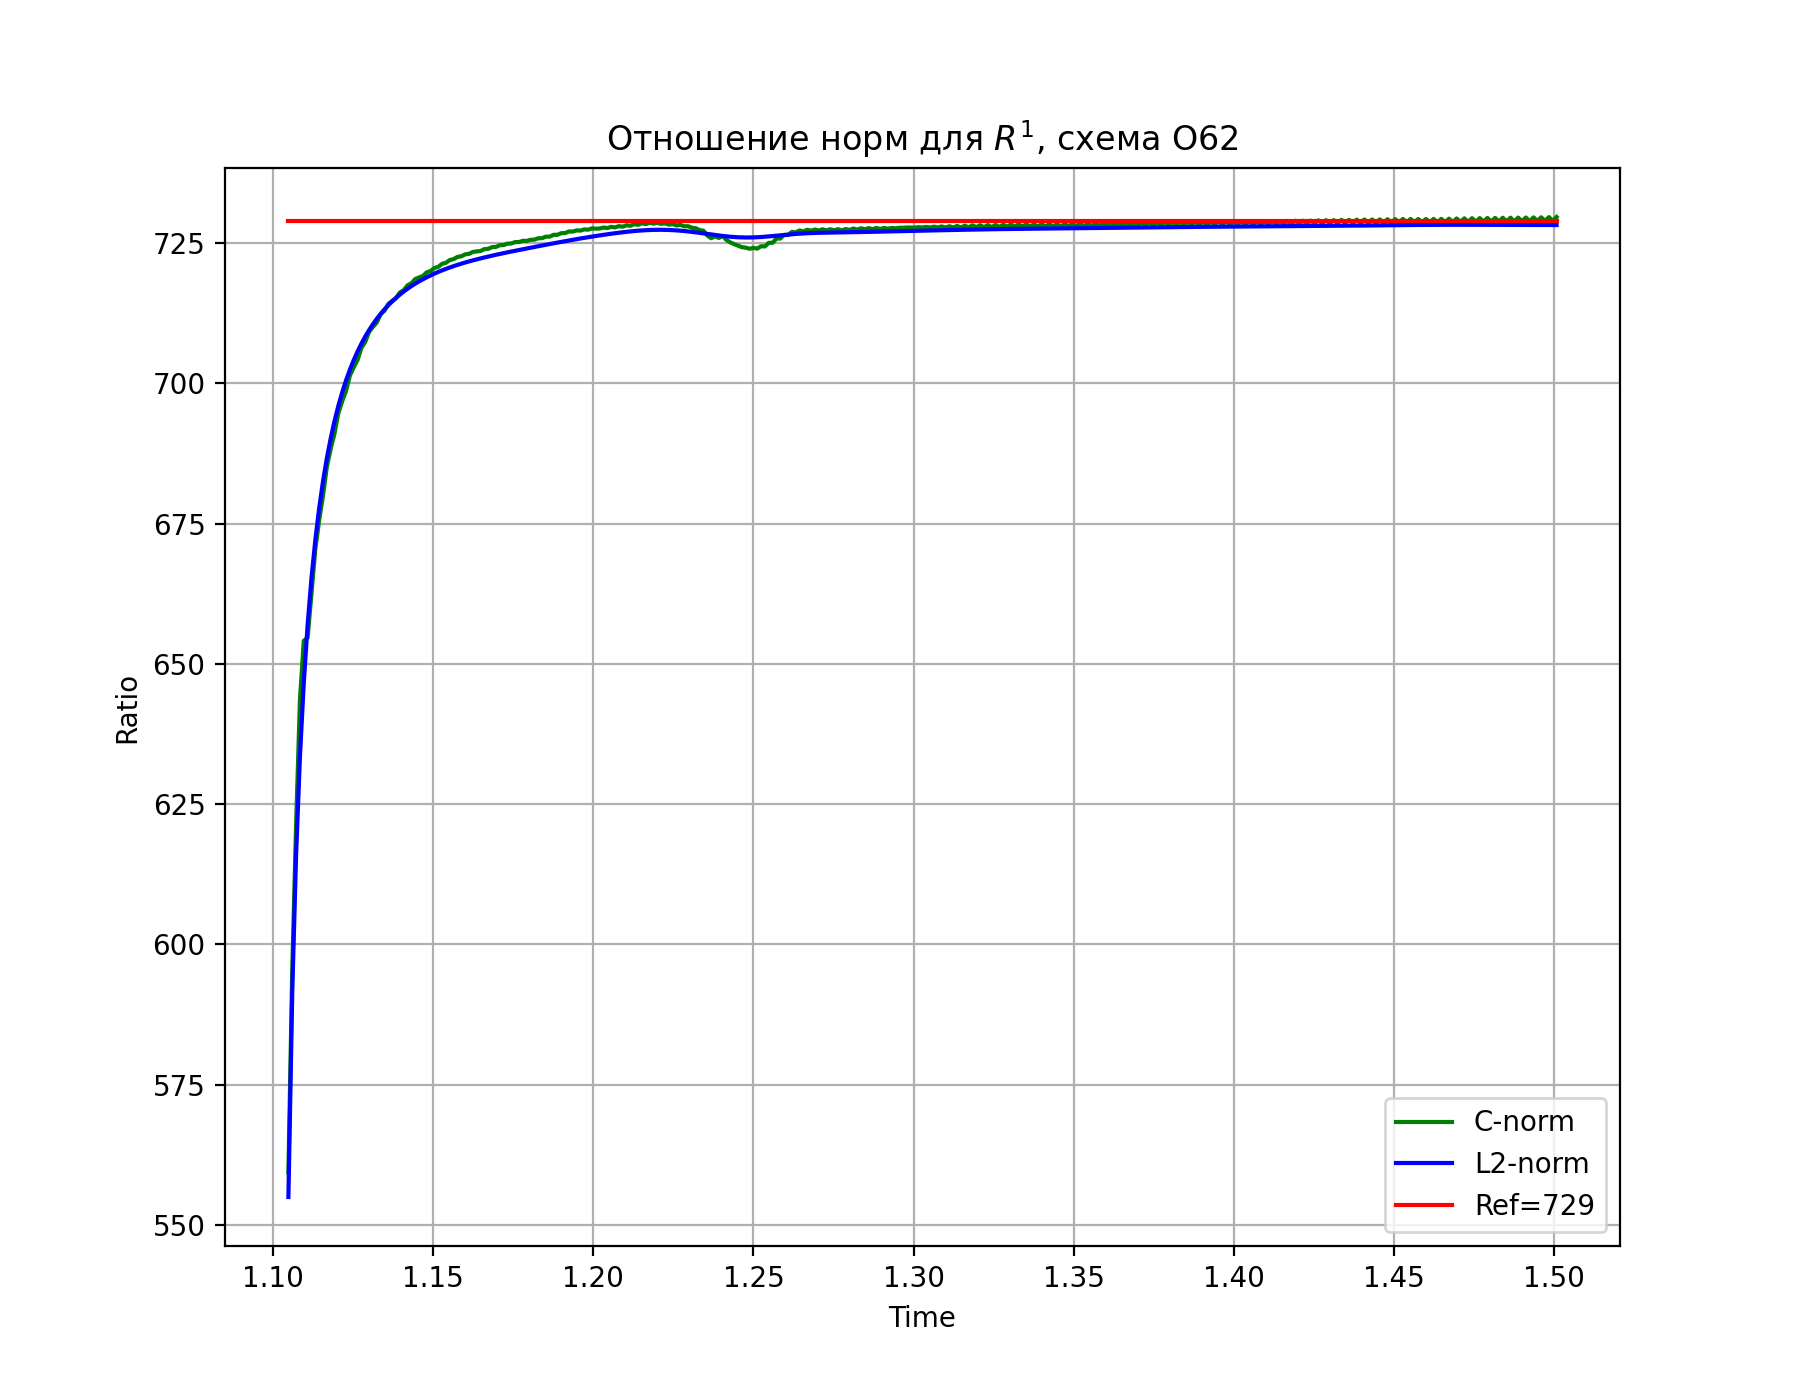

In [21]:
fig1, ax1 = plt.subplots(figsize = (9, 7))
ax1.plot(time[2:], norm_c[2:], 'g')
ax1.plot(time[2:], norm_L2[2:], 'b')
ax1.plot(time[2:], [729 for _ in range(len(time) - 2)], 'r')
# ax.plot(time[2:], [3 for _ in range(len(time) - 2)], 'r')
ax1.set_title(f"Отношение норм для $R^{1}$, схема O62")
ax1.grid()
ax1.legend(['C-norm', 'L2-norm', 'Ref=729'], loc=4)
ax1.set_xlabel('Time')
ax1.set_ylabel('Ratio')

plt.show()